# BENGALURU HOUSE PREDICTION

## Load the necessary libraries and the dataset


In [53]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [55]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Exploratory Data Analysis

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


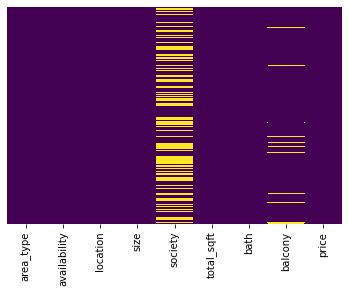

In [57]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [58]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [59]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Jun               1
16-Nov               1
16-Oct               1
16-Jan               1
16-Jul               1
Name: availability, Length: 81, dtype: int64

In [60]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
19 BHK           1
12 Bedroom       1
14 BHK           1
16 BHK           1
18 Bedroom       1
43 Bedroom       1
27 BHK           1
13 BHK           1
Name: size, dtype: int64

In [61]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
V6estde     1
Tinori      1
Nencei      1
CalanGo     1
SaMTBai     1
Name: society, Length: 2688, dtype: int64

## Data Cleaning

In [62]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [63]:
from math import floor

bath_median = float(floor(df.bath.median()))
balcony_median = float(floor(df.balcony.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)

In [64]:
df=df.dropna()

### Size
Now we will convert the size column to bhk as it is not possible for the model to learn from categorical features

In [65]:
df['bhk']=df['size'].apply(lambda x:int(x.split()[0]))
df=df.drop('size', axis=1)

<ipython-input-65-5a0f614cf05a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk']=df['size'].apply(lambda x:int(x.split()[0]))


In [66]:
df['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [67]:
def myFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [68]:
df[~df['total_sqft'].apply(myFloat)]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,BrereAt,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,Gollela,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,Vaarech,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,Pardsri,1020 - 1130,2.0,2.0,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,Ranuetz,1133 - 1384,2.0,0.0,59.135,2


In [19]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [69]:
df['total_sqft']=df['total_sqft'].apply(sqft_to_num)

In [70]:
df.dropna()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,18-May,Old Airport Road,Jaades,2732.0,4.0,2.0,204.00,4
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,Aklia R,1345.0,2.0,1.0,57.00,3
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2


In [71]:
df = df.dropna()

In [72]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,18-May,Old Airport Road,Jaades,2732.0,4.0,2.0,204.00,4
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,Aklia R,1345.0,2.0,1.0,57.00,3
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2


## Feature Enginnering

In [73]:
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

In [74]:
df.location=df.location.apply(lambda x: x.strip())

In [75]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_less_than_10 = location_stats[location_stats<=10]

In [76]:
df.location = df.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)

In [77]:
df.loc[df['availability']!='Ready To Move', 'availability']='unavailable'

## REMOVING OUTLIERS

In [78]:
# Removing the rows that have 1 Room for less than 300sqft
df = df[~(df.total_sqft/df.bhk<300)]

## PREDICTION

In [30]:
df=pd.get_dummies(df, drop_first=True)

In [31]:
X=df.drop('price', axis=1)
y=df['price']

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
df

,total_sqft,bath,balcony,price,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_unavailable,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
0,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4,4615.384615,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,1.0,38.00,2,3247.863248,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,2.0,204.00,4,7467.057101,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,1345.0,2.0,1.0,57.00,3,4237.918216,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13314,1715.0,3.0,3.0,112.00,3,6530.612245,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,0.0,231.00,5,6689.834926,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,1.0,60.00,2,5258.545136,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
reg=LinearRegression()

In [37]:
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
reg.score(X_test, y_test)

0.8881944996415754

In [43]:
y_pred = reg.predict(X_test)
y_pred

array([ 27.57807428,  52.90278366,  77.88340219, ..., 144.07313954,
        71.29374102,  12.24358755])

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
tree = DecisionTreeRegressor()

In [47]:
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [48]:
tree.score(X_test,y_test)

0.9386933763851872

In [49]:
from sklearn.neural_network import MLPRegressor

In [50]:
mlp = MLPRegressor()

In [51]:
mlp.fit(X_test,y_test)

MLPRegressor()

In [52]:
mlp.score(X_test,y_test)

0.727087016800612